In [19]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Carregamento do Dataset 

In [20]:
# Carregamento do dataset
df_sensores = pd.read_csv('../dataset/sensores.csv')

In [ ]:
#pd.set_option('future.no_silent_downcasting', True)

# Mapear os valores para os números desejados
#mapeamento = {1:'Classe A', 2:'Classe B', 3:'Classe C', 4:'Classe D', 5:'Classe E'}

# Substituir os valores na primeira coluna de acordo com o mapeamento
#df_sensores.iloc[:, 0] = df_sensores.iloc[:, 0].replace(mapeamento)

In [21]:
# Mostrar 5 primeiros registros do Dataframe
df_sensores.head(5)

,Classe,ID,0,1,2,3,4,5,6,7,...,190,191,192,193,194,195,196,197,198,199
0,4,1,-0.032906,-0.037456,-0.034082,-0.001968,0.084229,0.156574,0.128887,0.042514,...,-0.036180,-0.099786,-0.080654,-0.070954,-0.003636,0.012660,0.028986,0.008340,0.065012,0.091692
1,1,1,0.198619,0.178949,0.072092,0.083383,0.151363,0.108910,-0.099102,-0.195660,...,-0.306607,-0.135897,-0.024512,0.103591,0.168580,0.032522,0.117073,0.001361,0.060746,0.093414
2,1,1,-0.000792,0.012913,0.017356,0.024251,0.022153,0.019270,0.017725,0.013644,...,0.027556,0.016042,0.014681,0.017848,0.015588,0.011422,0.008025,0.009931,0.006395,0.002775
3,2,1,-0.086419,-0.112830,-0.124875,-0.029539,-0.067434,-0.077257,0.064067,0.075505,...,0.023029,-0.032053,0.002037,0.062153,-0.033044,-0.065966,-0.102277,-0.187535,-0.140448,-0.050016
4,4,1,-0.185975,-0.066973,0.042906,0.007640,-0.038686,-0.012729,0.111408,0.104206,...,0.074705,0.114014,0.089271,0.050639,-0.007533,-0.037725,0.003866,-0.020646,-0.089609,-0.127734


# Treinamento do Modelo

In [22]:
# Importando bibliotecas do sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [23]:
# Modelo - Sem Classe e ID
# Variáveis independentes
X = df_sensores.drop( columns=['Classe', 'ID'])
# Resultado
y = df_sensores['Classe']

In [24]:
# Dividir o conjunto entre treino e teste
# Treina com 70% do dataset e 30% de teste
# random_state 51 garante que a seleção do conjunto de teste não altere
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=51)

In [25]:
len(y_test)

66354

In [26]:
# Treinando o Algoritmo de Regressão Linear - Modelo
model = LinearRegression().fit(X_train, y_train)

In [27]:
# Gerar Predições do conjunto de testes com base no Modelo
y_pred = model.predict(X_test)

# Validar Modelo - Métricas

In [28]:
# Equação da Reta - Regressão Linear
# y = ax + b

# Neste caso, temos vários x porque nosso modelo tem várias colunas
# Para cada x existe um a1, a2…
model.coef_

array([-3.26899616e-05,  1.07178959e-04,  7.85868744e-05, -2.80759634e-04,
        1.13556956e-04,  6.49181126e-05, -6.78198336e-05,  2.35632811e-04,
       -4.93321134e-04, -3.50287475e-04,  2.98293907e-05,  3.32557234e-04,
        3.90622362e-04,  1.96046219e-04,  2.29633583e-04,  5.38841765e-04,
       -1.64959258e-04, -4.83848444e-04, -4.87290004e-04,  2.35842040e-04,
       -1.30737952e-04,  5.78315399e-04, -2.64416872e-04,  1.82458135e-04,
        5.48919213e-06, -3.39210884e-04,  1.23654001e-04,  3.19198411e-04,
       -1.08484847e-04, -4.81457896e-04,  6.63292829e-05, -2.19487331e-04,
       -2.92253961e-04, -1.36233810e-04, -2.60084042e-04, -2.07048817e-04,
       -8.35981611e-05, -9.06376405e-05,  2.15513388e-04, -4.34303754e-04,
        2.17678319e-04,  3.70859005e-05,  4.47315441e-06,  2.56372695e-04,
        5.08511976e-04, -1.66962565e-04,  1.30618890e-05,  4.93665693e-04,
        1.28508922e-04, -1.80628500e-04, -3.55791525e-04, -3.05154922e-04,
        2.09672800e-04,  

In [29]:
# Temos também o valor de b
model.intercept_

3.001443801430198

In [30]:
#  Predição dos valores com base no conjunto de teste
y_pred = model.predict(X_test)

In [31]:
# R2 Score - Conjunto de Treinamento
# Em uma escala de - infinito até 1, tenta explicar o quanto x explica y
# Quanto mais próximo de 1, melhor o modelo
model.score(X_train, y_train)

# Resultado: 0.0010623811383394521
# O próprio conjunto de treinamento não conseguiu encontrar uma relação entre as variáveis

0.0010623811383394521

In [32]:
# R2 Score - Conjunto de Testes
model.score(X_test, y_test)

# Resultado: -0.0011798282340873545
# Conjunto não performou não conjunto de treinamento e nem no conjunto de testes

-0.0011798282340873545

In [33]:
# R2 Score - Testes
r2_score(y_test, y_pred)

# Resultado: -0.0011798282340873545

-0.0011798282340873545

In [34]:
# MAE (Mean Absolute Error)
# MAE = Media ( y_test - y_pred)
# MAE é menos sensível a outliers e penaliza grandes erros

mean_absolute_error(y_test, y_pred)

# Resultado: 1.204590296131403

# O modelo supervisionado baseado no algoritmo de Regressão Linear não conseguiu predizer os padrões. 

1.204590296131403

In [35]:
# RMSE (Square Root Mean Squared Error)
# É uma métrica fácil de interpretar
mean_squared_error(y_test, y_pred, squared=False)

# Resultado: 1.416130889762221

/Users/brunobandeirafernandes/.local/share/virtualenvs/PredictiveMaintenance_IA_Python-A8hD1UWB/lib/python3.12/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


1.416130889762221

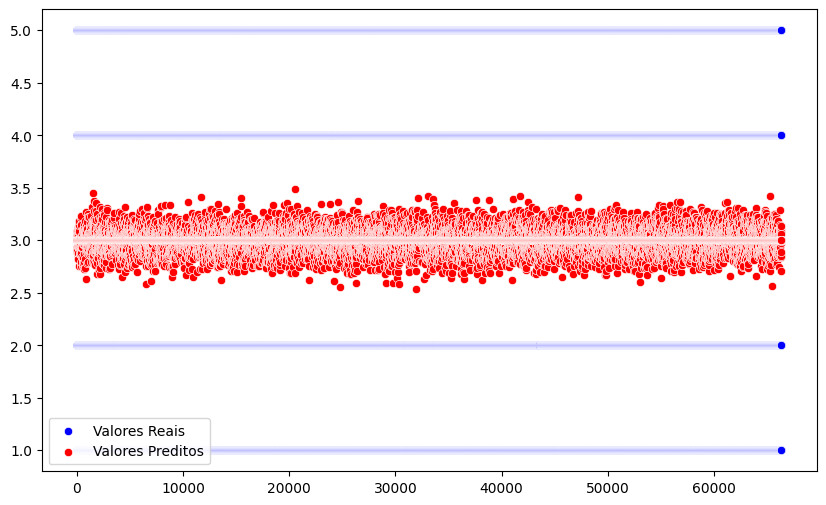

In [39]:
# Análise Gráfica
x_axis = range(len(y_test))
plt.figure(figsize=(10,6))
sns.scatterplot(x=x_axis, y=y_test.values.reshape(-1), color='blue', label='Valores Reais')
sns.scatterplot(x=x_axis, y=y_pred.reshape(-1), color='red', label='Valores Preditos')
plt.legend()
plt.show()


In [ ]:
# Como não é uma abordagem de Regresão Simples, não é possível criar o gráfico e analisar a reta linear
#plt.scatter(X_test, y_test, color='g')
#plt.plot(X_test, y_pred, color='k')